In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telco.csv')

In [3]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   int64  
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   int64  
 6   internet_service   7038 non-null   int64  
 7   contract_type      7038 non-null   int64  
 8   payment_type       7038 non-null   object 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 769.8+ KB


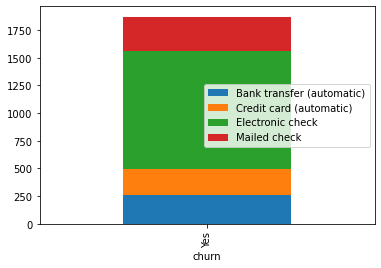

In [5]:
payment_ct = pd.crosstab(df.churn.where(df.churn == 'Yes'), df.payment_type)
#sns.barplot(x='monthly_charges',y='payment_type', hue ='churn', data = df)
payment_ct.plot(kind='bar', stacked = True)
plt.legend()

## NOTES:
these 2 charts show that although the majority of customers who church pay by electronic check (not auto-draft), the monthly amount has less of an impact on churn within that category than it does in the other categories.

<AxesSubplot:xlabel='tenure', ylabel='payment_type'>

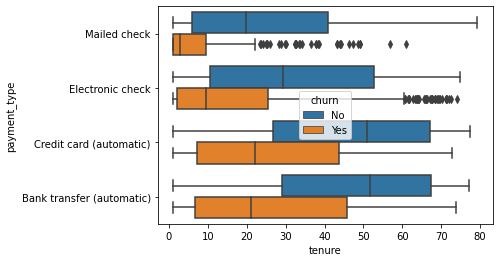

In [41]:
sns.boxplot(x='tenure',y='payment_type', data = df, hue = 'churn')

## Note 2:
this boxplot appears to suggest that convenience of payment type plays a factor in how quickly we see churn. mailed checks, and e-checks seem to show churn right away. 

<AxesSubplot:xlabel='churn', ylabel='tenure'>

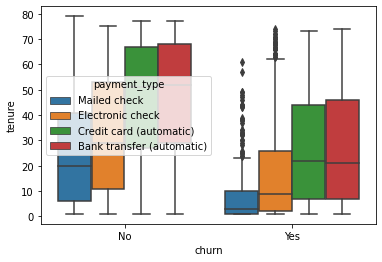

In [281]:
df['tenure'] = round(df['tenure'])

sns.boxplot(x='churn',y='tenure', data=df, hue='payment_type')



## Note 3:
the overwhelming majority of churn happens within the first 2 years

In [6]:

df.payment_type = df.payment_type.astype('string')

df['high_risk'] = (df.payment_type.str.startswith('E') |
                   df.payment_type.str.startswith('M'))

df.high_risk = df.high_risk.where(df.tenure<6).astype('string')

df.info()

df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   int64  
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   int64  
 6   internet_service   7038 non-null   int64  
 7   contract_type      7038 non-null   int64  
 8   payment_type       7038 non-null   string 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
 13  high_risk          1415 non-null   string 
dtypes: float64(3), int64(4), object(5), string(2)
memory usage: 824.8+ KB


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,high_risk
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0,<NA>
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1,<NA>
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8,True
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6,<NA>
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2,True


In [244]:


print(pd.crosstab(df.high_risk, df.contract_type, normalize='index'))



pd.crosstab(df.churn,df.high_risk,margins=True)



contract_type         0         1         2
high_risk                                  
False          0.802597  0.138961  0.058442
True           0.880086  0.081799  0.038116


high_risk,False,True,All
churn,,,
No,511,1281,1792
Yes,259,1054,1313
All,770,2335,3105


## Note 4:

"High Risk" is defined as customers who are not taking advantage of auto-draft and have a tenure of less than 24 months.

since the majority of those who churn fall into the high risk category it appears to be a good predictor. 



In [348]:
df.churn = df.churn.astype('string')
print(df.churn.value_counts())
print(df.churn.where(df.tenure<7).value_counts())
786/1870



No     5168
Yes    1870
Name: churn, dtype: Int64
Yes    786
No     692
Name: churn, dtype: Int64


0.4203208556149733

In [376]:
(df[((df.payment_type.str.startswith('E') |
     df.payment_type.str.startswith('M'))&
     df.churn.str.startswith('Y')&
     df.tenure<7)].monthly_charges.agg('average'))*786

50919.81167945439

In [378]:
50919.81/2

25459.905